In [1]:
from graph import Graph
from helpers import open_file, create_evenly_spaced_time_periods, Edge

In [2]:
help(Graph)

Help on class Graph in module graph:

class Graph(builtins.object)
 |  Graph(edges_list: List[helpers.Edge], interval_start: int, interval_end: int)
 |  
 |  The Graph class represents a temporal subgraph, capturing a subset of edges that occur within a specified
 |  time interval. It provides functionalities for analyzing the structure and centrality of this subgraph.
 |  
 |  __init__ Method
 |  Description:
 |  Initializes a Graph instance, representing a subgraph of temporal edges within a specified time interval.
 |  Filters the provided edges_list to include only edges whose timestamps fall within the specified interval.
 |  Creates internal data structures to store the edges, vertices, adjacency list, and other graph-related information.
 |  
 |  Parameters:
 |  edges_list (List[Edge]): A list of Edge objects, each representing an edge in the graph with attributes source,
 |  target, and timestamp.
 |  interval_start (int): The inclusive start of the time interval. Only edges wi

In [3]:
edges = sorted(open_file('./source_data/sx-stackoverflow.txt', n_rows=150),
               key=lambda x: x.timestamp )

time_start = edges[0].timestamp
time_end = edges[-1].timestamp
time_periods = create_evenly_spaced_time_periods(start=time_start, stop=time_end, n_periods=3)

all_graphs = []
for time_period in time_periods:
    start = time_period[0]
    end = time_period[1]
    if end == time_end:
        end += 1
    g = Graph(edges_list=edges, interval_start=start, interval_end=end)
    all_graphs.append(g)
    del edges[:len(g)]

In [4]:
print(len(all_graphs))

3


In [5]:
g1, g2, g3 = all_graphs

### Below there is a short description of the method implemented within the class.

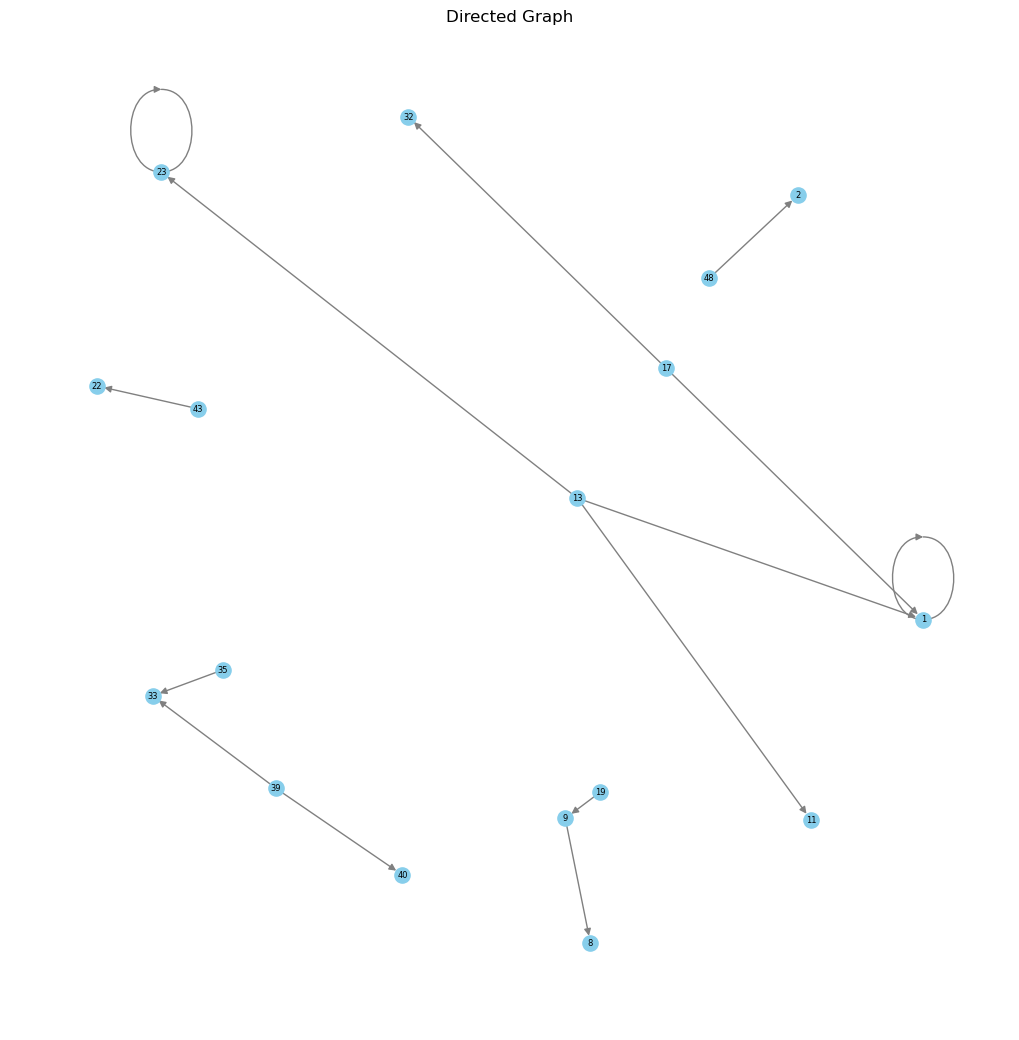

In [6]:
g1.plot()

In [7]:
g1.adjacency_list

defaultdict(list,
            {'9': ['8'],
             '1': ['1'],
             '13': ['1', '23', '11'],
             '17': ['1', '1', '32'],
             '48': ['2'],
             '19': ['9'],
             '23': ['23'],
             '35': ['33'],
             '39': ['33', '40'],
             '43': ['22']})

In [8]:
g1.adjacency_matrix

,9,8,1,13,17,48,2,19,23,11,35,33,39,43,22,32,40
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
17,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
g1.vertices # only the end vertices

{'1', '11', '2', '22', '23', '32', '33', '40', '8', '9'}

In [10]:
g1.all_vertices # Both source and end vertives

['9',
 '8',
 '1',
 '13',
 '17',
 '48',
 '2',
 '19',
 '23',
 '11',
 '35',
 '33',
 '39',
 '43',
 '22',
 '32',
 '40']

In [11]:
g1.edges

[Edge(source='9', target='8', timestamp=1217567877),
 Edge(source='1', target='1', timestamp=1217573801),
 Edge(source='13', target='1', timestamp=1217606247),
 Edge(source='17', target='1', timestamp=1217617639),
 Edge(source='48', target='2', timestamp=1217618182),
 Edge(source='17', target='1', timestamp=1217618239),
 Edge(source='19', target='9', timestamp=1217618357),
 Edge(source='13', target='23', timestamp=1217618560),
 Edge(source='13', target='11', timestamp=1217618799),
 Edge(source='23', target='23', timestamp=1217619360),
 Edge(source='35', target='33', timestamp=1217620542),
 Edge(source='39', target='33', timestamp=1217620597),
 Edge(source='43', target='22', timestamp=1217620971),
 Edge(source='17', target='32', timestamp=1217621272),
 Edge(source='39', target='40', timestamp=1217621416)]

In [12]:
g1.reachable_neighbors

{'9': ['8'],
 '1': [],
 '13': ['1', '23', '11'],
 '17': ['1', '1', '32'],
 '48': ['2'],
 '19': ['9', '8'],
 '23': [],
 '35': ['33'],
 '39': ['33', '40'],
 '43': ['22']}

In [13]:
g1.shortest_paths

{'9': {'8': ['9', '8']},
 '1': {},
 '13': {'1': ['13', '1'], '23': ['13', '23'], '11': ['13', '11']},
 '17': {'1': ['17', '1'], '32': ['17', '32']},
 '48': {'2': ['48', '2']},
 '19': {'9': ['19', '9'], '8': ['19', '9', '8']},
 '23': {},
 '35': {'33': ['35', '33']},
 '39': {'33': ['39', '33'], '40': ['39', '40']},
 '43': {'22': ['43', '22']}}

In [14]:
g1.all_shortest_paths # handles cases where there are more than one shortest path between a pair of vertices

{'9': {'8': [['9', '8']]},
 '1': {},
 '13': {'1': [['13', '1']], '23': [['13', '23']], '11': [['13', '11']]},
 '17': {'1': [['17', '1'], ['17', '1']], '32': [['17', '32']]},
 '48': {'2': [['48', '2']]},
 '19': {'9': [['19', '9']], '8': [['19', '9', '8']]},
 '23': {},
 '35': {'33': [['35', '33']]},
 '39': {'33': [['39', '33']], '40': [['39', '40']]},
 '43': {'22': [['43', '22']]}}

In [15]:
g1.nodes_indegree

9     1
8     1
1     3
13    0
17    0
48    0
2     1
19    0
23    2
11    1
35    0
33    2
39    0
43    0
22    1
32    1
40    1
Name: Degree, dtype: int64

In [16]:
g1.nodes_outdegree

9     1
8     0
1     1
13    3
17    2
48    1
2     0
19    1
23    1
11    0
35    1
33    0
39    2
43    1
22    0
32    0
40    0
Name: Degree, dtype: int64

In [17]:
g1.nodes_degree

9     2
8     1
1     4
13    3
17    2
48    1
2     1
19    1
23    3
11    1
35    1
33    2
39    2
43    1
22    1
32    1
40    1
Name: Degree, dtype: int64

In [18]:
g1.get_neighbors_from_adjacency_matrix('13')

{'1', '11', '23'}

### Analysis methods

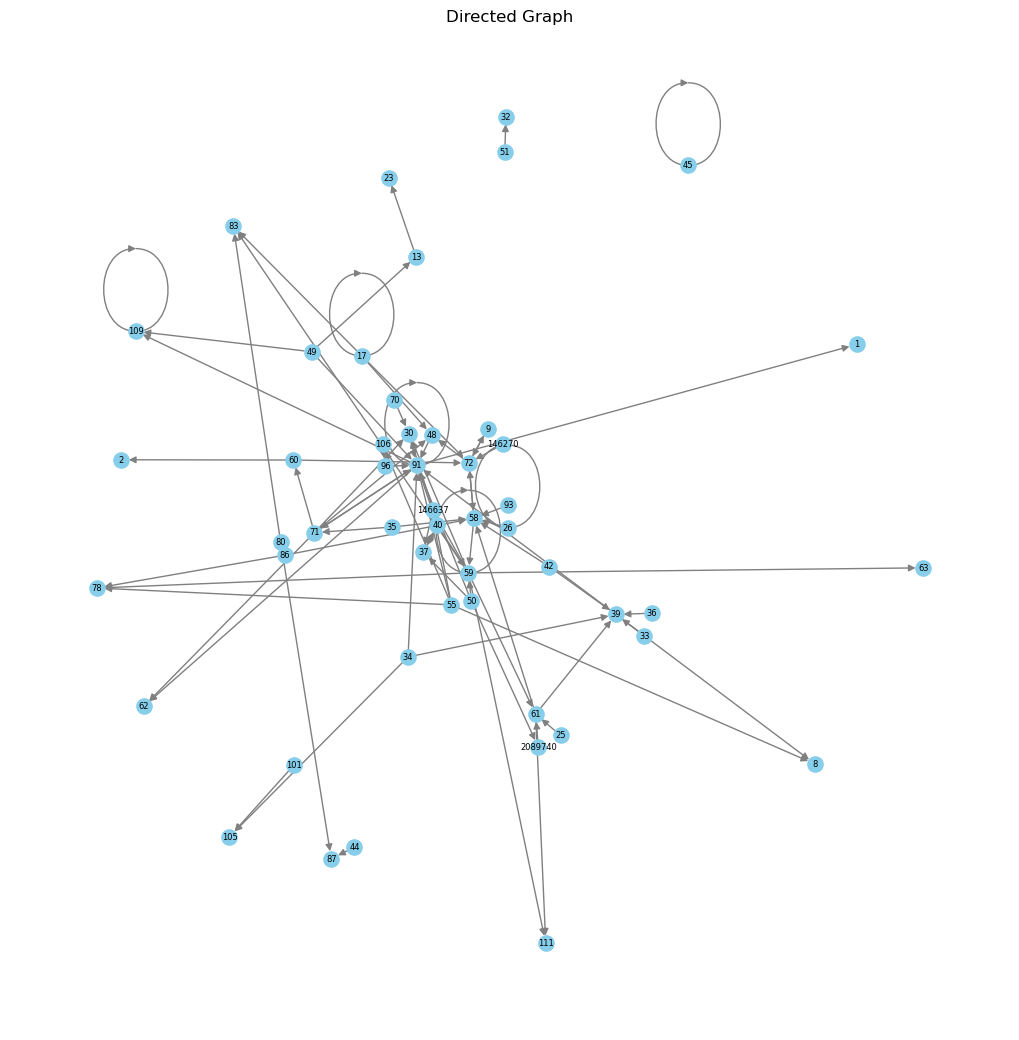

In [19]:
g2.plot()

In [20]:
g2.all_shortest_paths

{'37': {'40': [['37', '40']],
  '59': [['37', '40', '59']],
  '146637': [['37', '40', '146637'], ['37', '40', '146637']],
  '91': [['37', '40', '91']],
  '78': [['37', '40', '59', '78']],
  '30': [['37', '40', '59', '30'],
   ['37', '40', '146637', '30'],
   ['37', '40', '146637', '30']],
  '83': [['37', '40', '59', '83']],
  '63': [['37', '40', '59', '63']],
  '61': [['37', '40', '59', '61']],
  '111': [['37', '40', '59', '111']],
  '1': [['37', '40', '91', '1']],
  '62': [['37', '40', '91', '62']],
  '109': [['37', '40', '91', '109']],
  '71': [['37', '40', '91', '71']],
  '58': [['37', '40', '59', '61', '58']],
  '39': [['37', '40', '59', '61', '39']],
  '48': [['37', '40', '91', '71', '48']],
  '60': [['37', '40', '91', '71', '60']],
  '72': [['37', '40', '59', '61', '58', '72'],
   ['37', '40', '91', '71', '60', '72']],
  '8': [['37', '40', '59', '61', '39', '8']],
  '2': [['37', '40', '91', '71', '60', '2']],
  '9': [['37', '40', '59', '61', '58', '72', '9'],
   ['37', '40', '91'

In [21]:
g2.flattened_shortest_paths()

[['37', '40'],
 ['37', '40', '59'],
 ['37', '40', '146637'],
 ['37', '40', '146637'],
 ['37', '40', '91'],
 ['37', '40', '59', '78'],
 ['37', '40', '59', '30'],
 ['37', '40', '146637', '30'],
 ['37', '40', '146637', '30'],
 ['37', '40', '59', '83'],
 ['37', '40', '59', '63'],
 ['37', '40', '59', '61'],
 ['37', '40', '59', '111'],
 ['37', '40', '91', '1'],
 ['37', '40', '91', '62'],
 ['37', '40', '91', '109'],
 ['37', '40', '91', '71'],
 ['37', '40', '59', '61', '58'],
 ['37', '40', '59', '61', '39'],
 ['37', '40', '91', '71', '48'],
 ['37', '40', '91', '71', '60'],
 ['37', '40', '59', '61', '58', '72'],
 ['37', '40', '91', '71', '60', '72'],
 ['37', '40', '59', '61', '39', '8'],
 ['37', '40', '91', '71', '60', '2'],
 ['37', '40', '59', '61', '58', '72', '9'],
 ['37', '40', '91', '71', '60', '72', '9'],
 ['17', '72'],
 ['17', '48'],
 ['17', '83'],
 ['17', '72', '9'],
 ['17', '72', '58'],
 ['17', '48', '91'],
 ['17', '72', '58', '59'],
 ['17', '48', '91', '1'],
 ['17', '48', '91', '62'],

**Degree Centrality**

Degree centrality is a measure in network theory that quantifies how many connections a node has within a graph. It is one of the simplest and most intuitive centrality measures, often used to assess the influence or importance of a node in a network. To put it simply, it measures the popularity of a node within the graph.

In [22]:
g2.degree_centrality()

,Degree,Frequency Count,Relative Frequency
0,1,14,0.274510
1,2,15,0.294118
2,3,6,0.117647
3,4,4,0.078431
4,5,5,0.098039
5,6,1,0.019608
6,7,2,0.039216
7,8,1,0.019608
8,9,1,0.019608
9,12,1,0.019608


<Axes: title={'center': 'Frequency Distribution of Degree Centrality'}, xlabel='Degree', ylabel='Relative Frequency'>

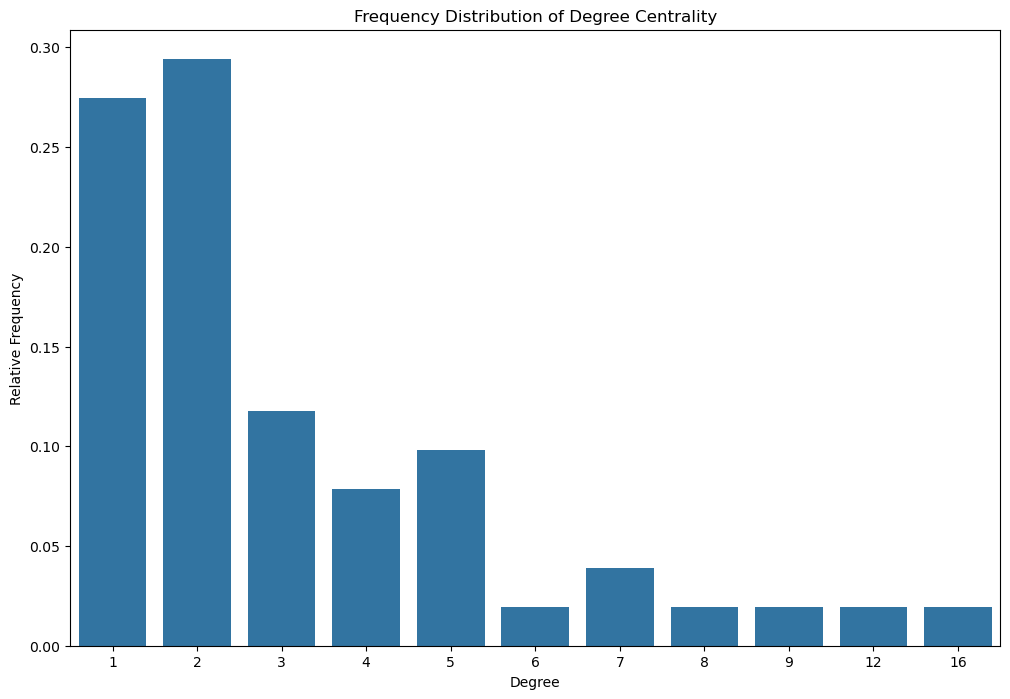

In [23]:
g2.plot_degree_centrality()


**Difference between Cut vertex and betweeness centrality**

 A cut vertex (or articulation point) is a node whose removal would disconnect the graph, meaning that the graph would no longer be cohesive, as it would result in separate components that can no longer reach each other.

Cut Vertex (Articulation Point):
Definition: A vertex in a graph is a cut vertex if, after its removal (along with its edges), the graph becomes disconnected. In other words, the removal of this vertex increases the number of connected components in the graph.
Importance: Cut vertices play a critical role in the structure of networks, as they represent vulnerabilities—removing them can isolate parts of the graph.


### Betweenness centrality
 Betweenness centrality is a measure of the importance of a node (or edge) in a graph based on how often that node appears on the shortest paths between other nodes. It quantifies the extent to which a node acts as a bridge in the flow of information or interaction within a network.

Key Concepts:
 * Shortest Path: The shortest route between two nodes in a graph. There may be more than one shortest path   between a pair of nodes.
 * Betweenness Centrality: A node’s betweenness centrality is determined by the fraction of all-pairs shortest paths that pass through the node.

**Formula of betweenness centrality**

    Cb(u) = Sum([c(u)] / Cst)

where:
  * c(u): number of shortest paths that pass through node u
  * Cst: total number of shortest paths
    * Finally find the summation of all distinct nodes






In [24]:
g2.betweenness_centrality()

defaultdict(int,
            {'37': 38,
             '40': 60,
             '59': 311,
             '146637': 54,
             '91': 394,
             '78': 33,
             '30': 120,
             '83': 35,
             '63': 34,
             '61': 181,
             '111': 34,
             '1': 37,
             '62': 37,
             '109': 37,
             '71': 278,
             '58': 334,
             '39': 156,
             '48': 114,
             '60': 223,
             '72': 289,
             '8': 34,
             '2': 37,
             '9': 55,
             '17': 21,
             '49': 22,
             '13': 3,
             '23': 2,
             '50': 33,
             '2089740': 27,
             '55': 36,
             '106': 23,
             '96': 42,
             '51': 1,
             '32': 1,
             '25': 40,
             '36': 20,
             '146270': 20,
             '34': 21,
             '105': 2,
             '26': 27,
             '35': 20,
             '42': 20,

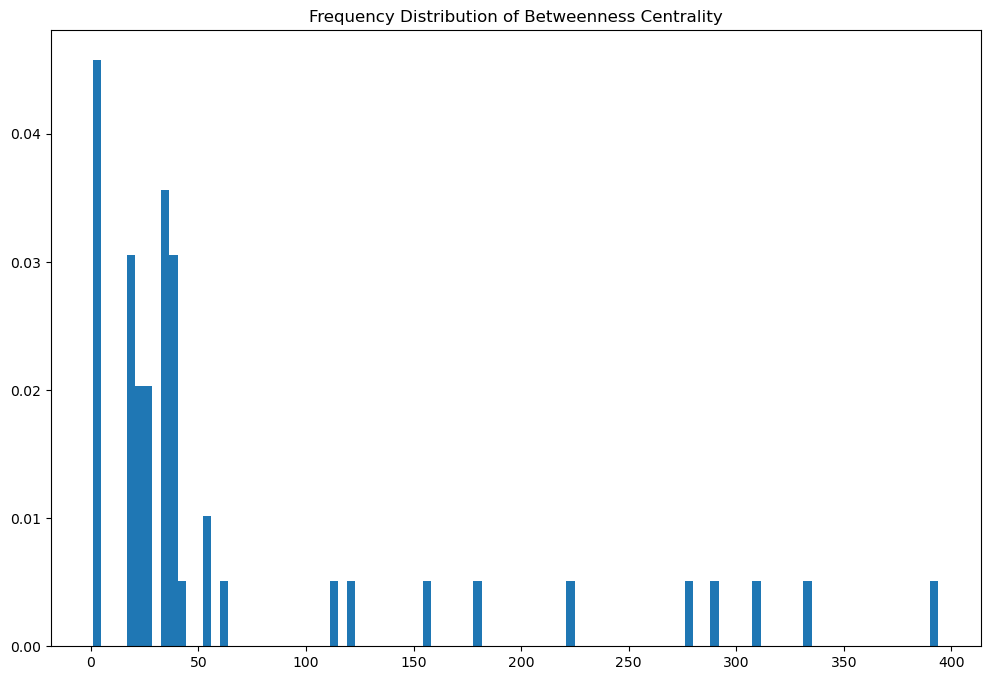

In [25]:
g2.plot_betweenness_centrality()

Closeness centrality is a measure used in graph theory to determine how central or important a node is within a network, based on its distance to all other nodes. It captures the idea of how quickly information can spread from a given node to others in the graph.


Key Ideas:

Higher Closeness: A node has high closeness centrality if it can quickly reach many other nodes, i.e., it is "close" to others in terms of path length.

Lower Closeness: A node has low closeness centrality if it is farther away from other nodes or in a more peripheral position in the network.

**Formula**

For a node 
u
v, closeness centrality 
C(v)  is defined as the reciprocal of the sum of the shortest path distances from 
v to all other nodes in the graph. Formally, the closeness centrality of a node **u** is given by:

    (n-1) / Sum(d(u,v))
    
* n is the number of nodes in the graph
* d(u,v) is the shortest path between node u and node v where v is a reachable node of u.

In [26]:
g2.closeness_centrality()

{'23': 11.0,
 '2': 0.1793,
 '2089740': 0.4648,
 '36': 0.3367,
 '25': 0.2357,
 '111': 0.2292,
 '62': 0.2821,
 '50': 0.3626,
 '17': 0.4853,
 '35': 0.6346,
 '146637': 0.44,
 '87': 16.5,
 '93': 0.2946,
 '83': 0.22,
 '80': 16.5,
 '48': 0.1746,
 '45': 0,
 '55': 0.3548,
 '70': 0.2973,
 '91': 0.2115,
 '34': 0.4074,
 '105': 16.5,
 '63': 0.2171,
 '101': 33.0,
 '9': 0.1473,
 '59': 0.1953,
 '39': 0.1493,
 '13': 16.5,
 '106': 0.2845,
 '78': 0.2276,
 '33': 0.3367,
 '1': 0.2773,
 '51': 33.0,
 '61': 0.1719,
 '96': 0.3402,
 '109': 0.2797,
 '32': 33.0,
 '49': 0.3438,
 '71': 0.1875,
 '58': 0.171,
 '86': 0.3,
 '60': 0.1557,
 '146270': 0.44,
 '42': 0.6,
 '72': 0.193,
 '8': 0.1953,
 '30': 0.1658,
 '26': 0.2946,
 '40': 0.4231,
 '37': 0.33,
 '44': 33.0}

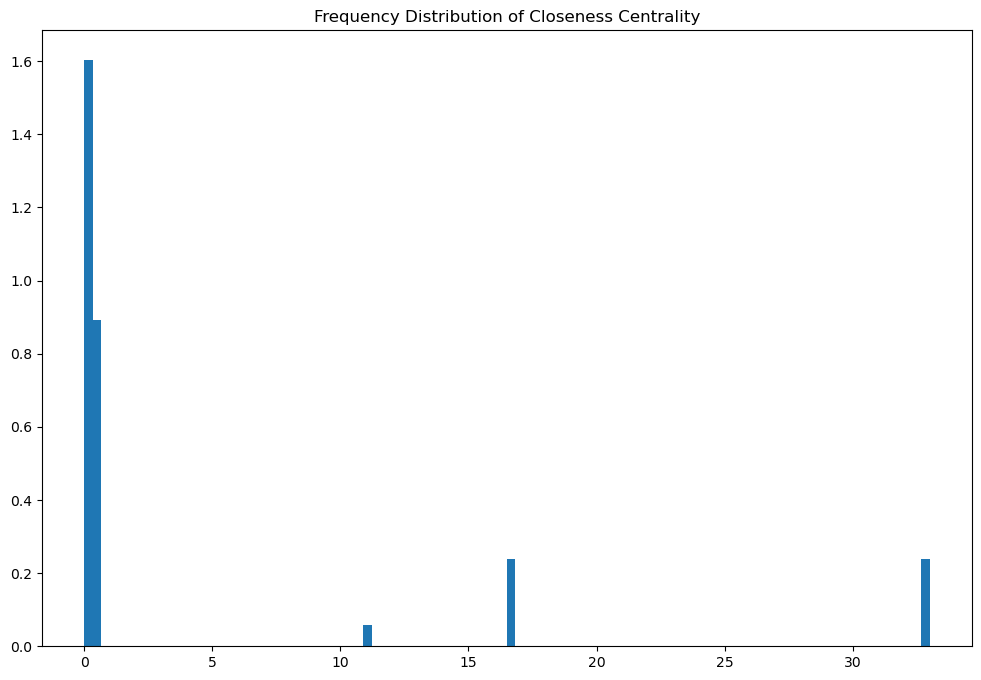

In [27]:
g2.plot_closeness_centrality()

### Eigenvector Centrality

Eigenvector centrality measures the importance of a node in a graph based on its connections to other important nodes. A node with high eigenvector centrality is connected to many other nodes that themselves have high centrality, capturing both direct and indirect influence within the network.

Key Concepts:

* **Influence** of Neighbors: A node is more important if it is connected to other important nodes. The centrality score depends on the centrality of its neighbors.
* **Iterative** Calculation: Centrality is calculated iteratively, updating each node's score based on the scores of its connected nodes.

Formula of Eigenvector Centrality
    
    C(v_i) = (1/λ) * Sum(A_ij * C(v_j))

where:

* A_ij: element of the adjacency matrix (1 if nodes i and j are connected, 0 otherwise)
* C(v_j): centrality of neighbor node j
* λ: the largest eigenvalue of the adjacency matrix

In [28]:
g2.eigenvector_centrality()

{'37': np.float64(0.2012),
 '40': np.float64(0.4241),
 '45': np.float64(0.0),
 '17': np.float64(0.2581),
 '49': np.float64(0.105),
 '13': np.float64(0.0),
 '23': np.float64(0.0),
 '50': np.float64(0.337),
 '55': np.float64(0.2473),
 '8': np.float64(0.0),
 '51': np.float64(0.0),
 '32': np.float64(0.0),
 '60': np.float64(0.0859),
 '2': np.float64(0.0),
 '39': np.float64(0.105),
 '59': np.float64(0.2214),
 '61': np.float64(0.1403),
 '58': np.float64(0.1909),
 '25': np.float64(0.0666),
 '2089740': np.float64(0.0666),
 '72': np.float64(0.1811),
 '9': np.float64(0.0859),
 '36': np.float64(0.0498),
 '146270': np.float64(0.0859),
 '34': np.float64(0.1548),
 '26': np.float64(0.1722),
 '35': np.float64(0.2069),
 '78': np.float64(0.0),
 '48': np.float64(0.105),
 '71': np.float64(0.2453),
 '42': np.float64(0.1403),
 '86': np.float64(0.0905),
 '146637': np.float64(0.2502),
 '30': np.float64(0.105),
 '80': np.float64(0.0),
 '87': np.float64(0.0),
 '44': np.float64(0.0),
 '70': np.float64(0.0498),
 '

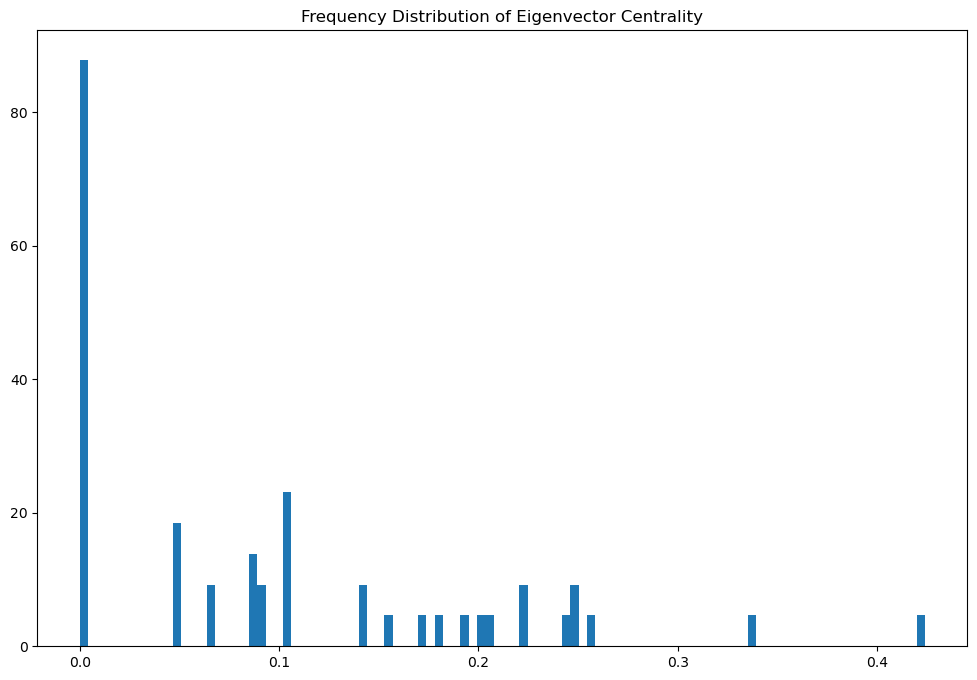

In [29]:
g2.plot_eigenvector_centrality()

### Katz Centrality

It is similar to Eigenvector Centrality but includes a parameter **a** (attenuation factor) to account for the length of walks in the graph and an optional parameter **b** that allows a baseline score for each node. The centrality calculation considers not only the importance of a node's neighbors but also the length of the connections (walks), allowing even distant nodes to contribute to a node's centrality, albeit with decreasing influence as the distance grows.

**Katz Centrality Formula:**

    C(v_i) = a * Sum(A_ij * C(v_j) + b)

Where:

* A_ij is the adjacency matrix.
* C(v_i) is the Katz centrality of the neighbor.
* a is the attenuation factor.
* b is the contribution to the centrality from each node itself

In [30]:
g2.katz_centrality()

{'37': np.float64(1.1605),
 '40': np.float64(1.6049),
 '45': np.float64(1.1111),
 '17': np.float64(1.5028),
 '49': np.float64(1.3848),
 '13': np.float64(1.1),
 '23': np.float64(1.0),
 '50': np.float64(1.5769),
 '55': np.float64(1.6169),
 '8': np.float64(1.0),
 '51': np.float64(1.1),
 '32': np.float64(1.0),
 '60': np.float64(1.2362),
 '2': np.float64(1.0),
 '39': np.float64(1.2637),
 '59': np.float64(1.8358),
 '61': np.float64(1.3583),
 '58': np.float64(1.3198),
 '25': np.float64(1.1358),
 '2089740': np.float64(1.1358),
 '72': np.float64(1.362),
 '9': np.float64(1.1362),
 '36': np.float64(1.1264),
 '146270': np.float64(1.1362),
 '34': np.float64(1.39),
 '26': np.float64(1.2578),
 '35': np.float64(1.294),
 '78': np.float64(1.0),
 '48': np.float64(1.1637),
 '71': np.float64(1.62),
 '42': np.float64(1.2583),
 '86': np.float64(1.232),
 '146637': np.float64(1.416),
 '30': np.float64(1.1637),
 '80': np.float64(1.2),
 '87': np.float64(1.0),
 '44': np.float64(1.1),
 '70': np.float64(1.1164),
 '

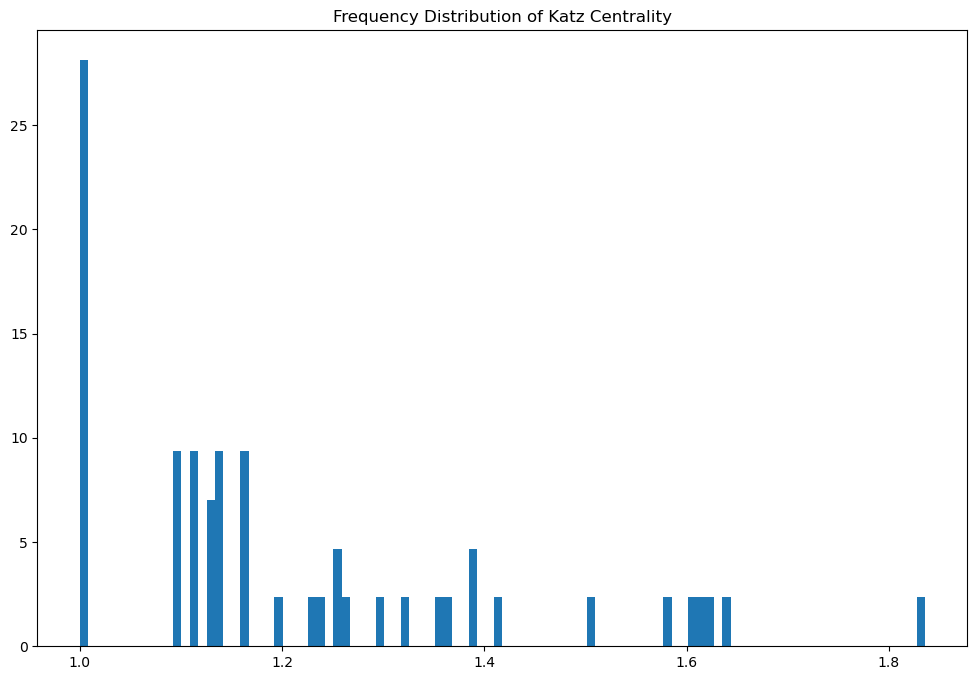

In [31]:
g2.plot_katz_centrality()

### Methods to update the graph

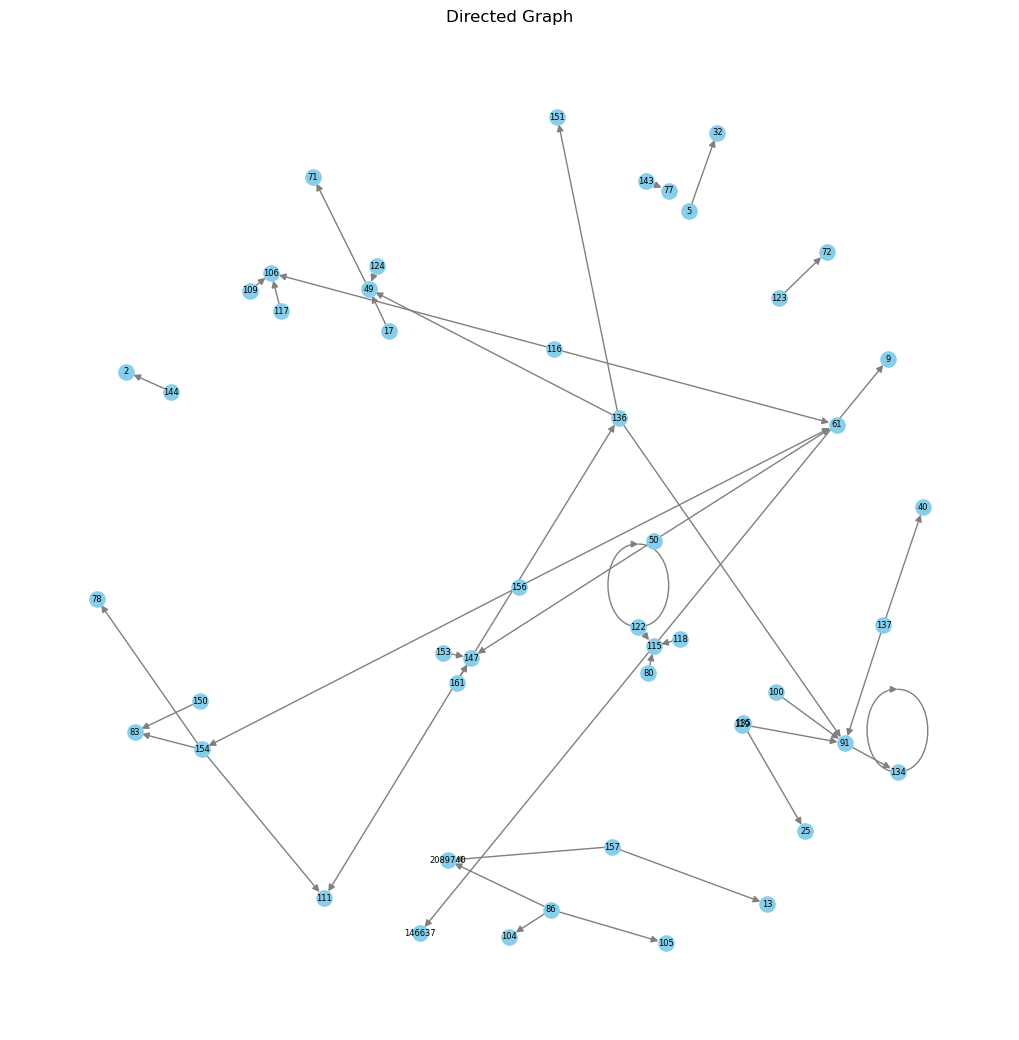

In [32]:
g3.plot()

In [33]:
g3.adjacency_list['100']

['91']

In [34]:
g3.append(Edge('100', '3', 10000000))

In [35]:
g3.adjacency_list['100']

['91', '3']

In [36]:
g3.append(Edge('5', '100', 10000000)) # The adjacency list does not represent the reciprocal relation.

In [37]:
g3.adjacency_list['100']

['91', '3']

In [38]:
g3.adjacency_list['5']

['32', '100']

In [39]:
g3.remove(Edge('5', '100', 10000000))

In [40]:
g3.adjacency_list['5']

['32']

In [41]:
g3.insert(0, Edge('10', '5', 10000000))

In [42]:
g3.edges[0]

Edge(source='10', target='5', timestamp=10000000)

In [43]:
g3.adjacency_list['10']

['5']